In [1]:
# TensorFlow와 Keras를 임포트합니다
import tensorflow as tf                   # TensorFlow 라이브러리를 임포트합니다
import keras                              # Keras 라이브러리를 임포트합니다
from keras import Sequential              # Keras에서 Sequential 모델을 임포트합니다
from keras.layers import Dense, Flatten   # Keras에서 Dense와 Flatten 레이어를 임포트합니다
from keras.datasets import fashion_mnist  # Keras에서 fashion_mnist 데이터셋을 임포트합니다

In [2]:
# Fashion MNIST 데이터셋을 로드합니다
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Fashion MNIST 데이터셋을 로드하고 훈련 이미지, 훈련 레이블, 테스트 이미지 및 테스트 레이블을 변수에 할당


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images[0] #=> 0은 검은색, 225는 흰색

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

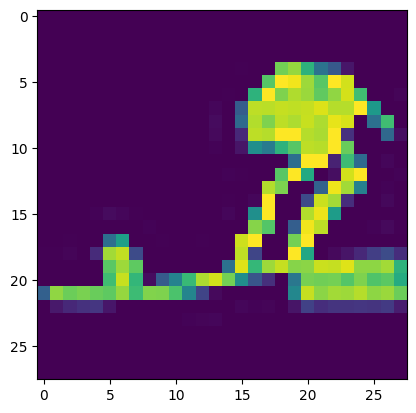

In [4]:
import matplotlib.pyplot as plt

plt.imshow(train_images[777])
plt.show()

In [5]:
type(train_images) #=> n차원의 배열

numpy.ndarray

In [6]:
# 이미지들을 정규화합니다 (0과 1 사이의 값으로)
# 이미지 픽셀 값은 0에서 255 사이의 범위를 갖습니다.
# 정규화를 통해 모든 픽셀 값을 0에서 1 사이의 값으로 스케일링합니다.
train_images = train_images / 255.0
# train_images /= 255.0 도 가능

test_images = test_images / 255.0
# 이미지 정규화는 이미지 데이터를 신경망 모델에 입력하기 전에 스케일을 조정하는 과정입니다.
# 일반적으로 0에서 255 사이의 픽셀 값은 0과 1 사이의 값으로 변환하여 모델의 학습을 더 안정적으로 만듭니다.
# 이렇게 정규화된 데이터는 학습 및 예측 과정에서 더 잘 동작합니다.

In [7]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
# 순차적 모델을 구축합니다
model = Sequential([
    # Flatten 레이어: 2D 이미지를 1D 배열로 변환하여 입력 데이터를 평평하게 만듭니다.
    # 이렇게 하면 이미지의 픽셀을 일렬로 나열하여 신경망에 입력할 수 있습니다.
    # 입력 이미지는 28x28 크기의 2D 배열입니다.
    Flatten(input_shape=(28, 28)),
    # Dense 레이어 (은닉층): 128개의 뉴런을 가집니다.
    # 활성화 함수로는 ReLU(Rectified Linear Activation)를 사용합니다.
    # 이 층은 입력 데이터에서 중요한 특징을 추출하는 역할을 합니다.
    # 128개의 은닉 뉴런과 ReLU 활성화 함수를 사용합니다.
    Dense(128, activation='relu'),

    # Dense 레이어 (출력 층): 10개의 뉴런을 가집니다.
    # 활성화 함수로는 Softmax를 사용합니다. Softmax는 다중 클래스 분류에 적합합니다.
    # 각 뉴런은 클래스(패션 아이템 카테고리)에 대한 확률을 출력합니다.
    # 10개의 클래스를 분류하기 위한 출력 층입니다.
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# 모델을 컴파일합니다
model.compile(
    optimizer='adam',                       # 옵티마이저로 'adam'을 사용합니다. Adam은 효율적인 경사 하강 알고리즘입니다.
    loss='sparse_categorical_crossentropy', # 손실함수로 'sparse_categorical_crossentropy'를 사용합니다.
    metrics=['accuracy']                    # 모델 평가 지표로 정확도를 사용합니다.
)

# sparse_categorical_crossentropy와 categorical_crossentropy의 차이

# sparse_categorical_crossentropy:
# - 레이블은 정수 형태로 주어집니다. 각 샘플의 레이블은 클래스의 인덱스입니다.
# - 예를 들어, 클래스가 0부터 9까지의 정수로 표현되는 경우 사용됩니다.
# - 모델의 출력은 클래스 수에 대한 로짓(점수)을 출력하며, 소프트맥스 활성화 함수와 함께 사용됩니다.

# categorical_crossentropy:
# - 레이블은 원-핫 인코딩된 벡터로 주어집니다. 각 클래스에 해당하는 요소는 1, 나머지는 0입니다.
# - 예를 들어, 클래스가 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]과 같이 벡터로 표현되는 경우 사용됩니다.
# - 모델의 출력은 클래스에 대한 확률 분포를 출력하며, 소프트맥스 활성화 함수와 함께 사용됩니다.

# 어떤 것을 선택해야 할지는 데이터의 레이블 표현 방식에 따라 다릅니다.
# sparse_categorical_crossentropy는 정수로 표현된 클래스 레이블에 적합하고,
# categorical_crossentropy는 원-핫 인코딩된 클래스 레이블에 적합합니다.

In [10]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=30)

In [11]:
# 모델을 학습시킵니다
# train_images: 훈련 이미지 데이터
# train_labels: 훈련 레이블 데이터
# epochs: 전체 데이터셋을 몇 번 반복해서 학습할지 지정합니다.

model.fit(train_images, train_labels, epochs=30, batch_size=100)

# 1. Epochs를 늘리고 GPU 설정하기
# 2. 조기 종료(Early Stopping) 도입하기:
# - 조기 종료는 모델이 과적합(overfitting)되는 것을 방지하기 위한 기술 중 하나입니다.
# - 모델 학습 중에 검증 데이터를 사용하여 모델의 성능을 모니터링합니다.
# - 성능이 일정 기간 동안 향상되지 않을 때 학습을 조기 종료합니다.
# - 이를 위해 Keras에서는 EarlyStopping 콜백을 사용할 수 있습니다.
# - 예를 들어, val_loss(검증 데이터의 손실)을 모니터링하고, 일정 epochs 동안 개선되지 않으면 학습을 종료할 수 있습니다.
# - EarlyStopping을 적용하려면 적절한 매개 변수(예: patience)를 설정하여 사용합니다.
# - 조기 종료를 사용하면 모델이 더 일반화되고 좋은 성능을 얻을 수 있습니다.

Epoch 1/30
600/600 [==============================] - 10s 5ms/step - loss: 0.5370 - accuracy: 0.8133
Epoch 2/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3963 - accuracy: 0.8608
Epoch 3/30
600/600 [==============================] - 3s 4ms/step - loss: 0.3591 - accuracy: 0.8717
Epoch 4/30
600/600 [==============================] - 3s 5ms/step - loss: 0.3309 - accuracy: 0.8814
Epoch 5/30
600/600 [==============================] - 4s 6ms/step - loss: 0.3124 - accuracy: 0.8853
Epoch 6/30
600/600 [==============================] - 2s 4ms/step - loss: 0.2966 - accuracy: 0.8921
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2848 - accuracy: 0.8960
Epoch 8/30
600/600 [==============================] - 1s 2ms/step - loss: 0.2727 - accuracy: 0.8994
Epoch 9/30
600/600 [==============================] - 1s 2ms/step - loss: 0.2634 - accuracy: 0.9022
Epoch 10/30
600/600 [==============================] - 1s 2ms/step - loss: 0.2541 - accuracy: 0.905

In [12]:
# 모델을 평가합니다
# test_images: 테스트 이미지 데이터
# test_labels: 테스트 레이블 데이터
# verbose: 평가 과정의 출력을 제어하는 매개 변수입니다. 0은 아무 출력도 하지 않고, 1은 진행 바와 함께 출력하며, 2는 간단한 출력을 합니다.

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# 평가 결과 설명:
# - 모델을 테스트 데이터로 평가하여 손실(test_loss)과 정확도(test_acc)를 계산합니다.
# - 손실은 모델의 예측이 실제 레이블과 얼마나 일치하지 않는지를 나타냅니다.
# - 정확도는 모델이 정확하게 분류한 샘플의 비율을 나타냅니다.
# - 모델의 성능을 평가하여 훈련 과정의 결과를 확인하고, 모델을 개선하는 데 도움을 줍니다.

313/313 - 1s - loss: 0.3436 - accuracy: 0.8910 - 680ms/epoch - 2ms/step


In [13]:
# 테스트 정확도를 출력합니다
print('\nTest accuracy:', test_acc)

# 이 코드는 모델의 테스트 정확도를 출력하는 부분입니다.
# test_acc는 모델 평가 결과에서 계산된 정확도를 나타내며, 이를 화면에 출력합니다.
# 테스트 정확도는 모델이 테스트 데이터에서 얼마나 정확하게 분류하는지를 나타내는 중요한 지표 중 하나입니다.


Test accuracy: 0.890999972820282


In [14]:
classifications = model.predict(test_images)

# 이 코드는 훈련된 모델을 사용하여 테스트 이미지에 대한 예측을 수행합니다.
# test_images는 테스트 데이터셋에 있는 이미지들을 나타내며, 모델은 이 이미지들을 분류합니다.
# model.predict() 함수는 각 이미지에 대한 모델의 예측 결과를 반환합니다.

# classifications 변수에는 예측 결과가 저장됩니다.
# classifications는 각 이미지에 대한 클래스 확률 분포를 나타내며, 예를 들어 첫 번째 이미지에 대한 확률 분포가 [0.1, 0.2, 0.3, ...] 형태일 수 있습니다.
# 이 분포에서 가장 높은 확률을 가지는 클래스가 모델의 예측 결과입니다.

# 이렇게 예측을 수행하면 모델이 각 테스트 이미지를 어떻게 분류하는지를 알 수 있으며,
# 이를 통해 모델의 성능을 평가하거나 예측 결과를 활용할 수 있습니다.

313/313 [==============================] - 1s 2ms/step


In [15]:
classifications

array([[1.5802206e-08, 3.5196540e-12, 3.1280370e-10, ..., 8.8557898e-04,
        4.5493226e-10, 9.9910706e-01],
       [1.9802841e-04, 1.8768632e-15, 9.9894530e-01, ..., 7.8318834e-21,
        4.1577754e-14, 9.3661580e-13],
       [1.5566216e-12, 1.0000000e+00, 8.2568598e-18, ..., 6.2128831e-24,
        1.5103956e-17, 2.8742330e-23],
       ...,
       [3.4852608e-05, 7.2490577e-14, 3.7565951e-05, ..., 3.0733405e-10,
        9.9992537e-01, 3.1604750e-11],
       [5.1815285e-10, 9.9999416e-01, 2.2234508e-12, ..., 1.1976077e-12,
        1.6907074e-10, 2.0449514e-11],
       [8.1021065e-09, 1.0840441e-10, 2.0683801e-09, ..., 2.2270695e-04,
        1.2197853e-08, 7.0250714e-08]], dtype=float32)

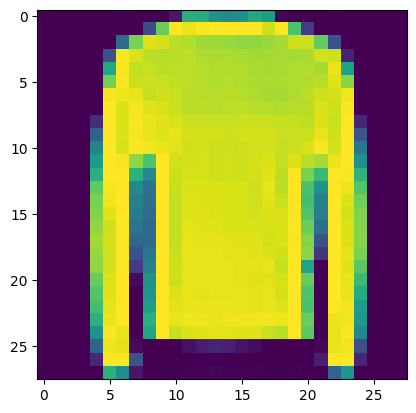

예측 : 2
실제 : 2


In [16]:
import numpy as np
import matplotlib.pyplot as plt

def show_result(index):
    # 이미지 표시
    plt.imshow(test_images[index] * 255)  # 이미지를 시각화하기 전에 정규화를 되돌립니다 (* 255)
    plt.show()

    # 예측 결과 출력
    # np.argmax() 함수는 배열에서 최댓값을 가지는 원소의 인덱스를 반환합니다.
    predicted_class = np.argmax(classifications[index])  # classifications에서 가장 높은 확률을 가지는 클래스의 인덱스를 찾습니다.
    print(f'예측 : {predicted_class}')  # 모델의 예측 결과를 출력합니다.

    # 실제 클래스(레이블) 출력
    true_class = test_labels[index]  # 테스트 데이터의 실제 클래스(레이블)를 가져옵니다.
    print(f'실제 : {true_class}')  # 실제 클래스(레이블)를 출력합니다.

show_result(77)

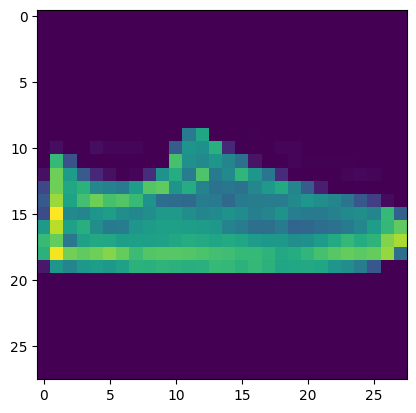

예측 : Bag
실제 : Sneaker


In [17]:
label_name = ['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

def show_result2(index):
    # 이미지 표시
    plt.imshow(test_images[index] * 255)  # 이미지를 시각화하기 전에 정규화를 되돌립니다 (* 255)
    plt.show()

    # 예측 결과 출력
    # np.argmax() 함수는 배열에서 최댓값을 가지는 원소의 인덱스를 반환합니다.
    predicted_class = label_name[np.argmax(classifications[index])]  # classifications에서 가장 높은 확률을 가지는 클래스의 인덱스를 찾습니다.
    print(f'예측 : {predicted_class}')  # 모델의 예측 결과를 출력합니다.

    # 실제 클래스(레이블) 출력
    true_class = label_name[test_labels[index]]  # 테스트 데이터의 실제 클래스(레이블)를 가져옵니다.
    print(f'실제 : {true_class}')  # 실제 클래스(레이블)를 출력합니다.

show_result2(12)